<a href="https://colab.research.google.com/github/JAleAguilera/GalaticRunner/blob/main/Alejandra_Aguilera_Marvik_Prueba_t%C3%A9cnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba técnica de Marvik

A continuación se encuentra un ejemplo práctico del uso de Deep Learning, utilizando Keras y Tensorflow.

---


## Predicción de series ordenadas en el tiempo

En este proyecto se hará una predicción de una serie ordenada en el tiempo usando un regresor RNN (Recurrent Neural Network regressor).

Se hará una predicción del precio de la acción de Apple con 7 días de anticipación, en base a una serie histórica.

Se hará uso de una arquitectura para el RNN conocida como [Long Term Short Memory (LTSM)](https://en.wikipedia.org/wiki/Long_short-term_memory).

### Parte 1: Primeros pasos
Primero se debe cargar una serie histórica. Cargaremos una serie con el precio de la acción de Apple de 140 días. Luego se hará un pre-procesamiento para utilizar la información con un modelo de una RNN. Como primer paso se normalizó el rango la serie. Esto ayuda a evitar grandes problemas numéricos asociados a como las funciones de activación como tanh transforman números muy grandes (sean positivos o negativos) y ayuda a evitar problemas con el cálculo de las derivadas.

Se normaliza la serie para que pertenezca al rango [-1,1] [usando esta función de la librería scikit](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). También es común ver aplicaciones donde se normaliza utilizando la desviación estándar.


In [1]:
### Cargar las librerías necesarias para el cargado de los datos y la normalización
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Clonar repositorio con los datos en espacio de trabajo
! git clone https://bitbucket.org/botiaio/campusparty_applestock.git

Cloning into 'campusparty_applestock'...
Unpacking objects: 100% (3/3), 1.77 KiB | 1.77 MiB/s, done.


In [2]:
### Cargar los datos normalizados
dataset = np.loadtxt('campusparty_applestock/normalized_apple_prices.csv')

In [3]:
# Obtener la longitud del dataset
longitud_dataset = len(dataset)

print("La longitud  es:", longitud_dataset)

La longitud  es: 138


In [71]:
#Obtener el shape del dataset
print("Shape es:", dataset.shape)

Shape es: (138,)


In [5]:
#Vista previa del dataset
dataset

array([-0.70062339, -0.82088484, -0.93938305, -0.9471652 , -0.68785527,
       -0.84325902, -0.80532018, -0.82058073, -0.92023124, -1.        ,
       -0.98814438, -0.85961411, -0.8706188 , -0.92661512, -0.80118585,
       -0.76288204, -0.66499478, -0.67289882, -0.68220115, -0.542119  ,
       -0.46508592, -0.21489592, -0.17020823, -0.08247456,  0.06411336,
        0.0857576 ,  0.38604654,  0.39468034,  0.40708331,  0.55482607,
        0.4571212 ,  0.217267  ,  0.38258092,  0.16187873,  0.16838432,
       -0.00227998,  0.21903043,  0.16187873,  0.3212949 ,  0.21939484,
        0.2579419 ,  0.30311627,  0.42818056,  0.42708622,  0.36190893,
        0.34075119,  0.5010795 ,  0.53816706,  0.70001536,  0.88229221,
        0.79577461,  0.88508912,  1.        ,  0.92406145,  0.82860613,
        0.68098508,  0.59264357,  0.47146979,  0.36482757,  0.2957594 ,
        0.11719085,  0.03547666,  0.24943019,  0.35734934, -0.06003953,
       -0.1577444 , -0.08831108, -0.14801663, -0.07827939, -0.19

In [6]:
#Primeros elementos del dataset
primeros_elementos = dataset[:5]
print("Los primeros elementos son:", primeros_elementos)

# Últimos elementos del dataset
ultimos_elementos = dataset[-5:]
print("Los últimos elementos son:", ultimos_elementos)

Los primeros elementos son: [-0.70062339 -0.82088484 -0.93938305 -0.9471652  -0.68785527]
Los últimos elementos son: [-0.04167795 -0.07888723 -0.05797255  0.23058249  0.33600865]


Observemos los datos cargados

Text(0, 0.5, 'serie normalizada')

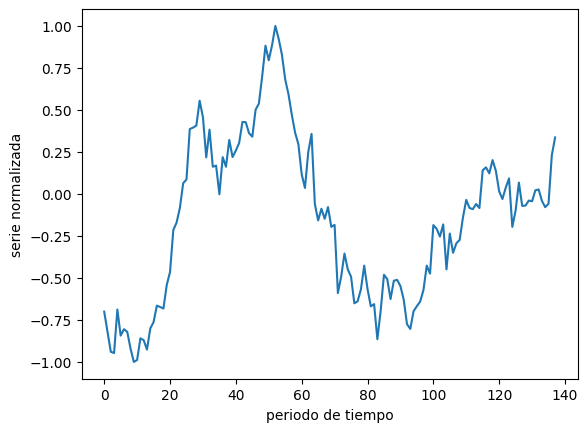

In [7]:
#Grafiquemos los datos
plt.plot(dataset)
plt.xlabel('periodo de tiempo')
plt.ylabel('serie normalizada')

### Parte 2: Cortar la serie ordenada en secuencias

Generalmente se representa matemáticamente una serie ordenada como:

$$s_{0},s_{1},s_{2},...,s_{P}$$


donde $s_{p}$ es el valor numérico de la serie en el intervalo de tiempo $p$ , siendo  $P$ el largo total de la serie. Para aplicar el RNN se debe tratar a la predicción como un problema de regresión. Para ello se debe usar una ventana móvil para construir un set asociado de pares de entrada-salida sobre los cuales aplicar la regresión.

Por ejemplo, para una ventana de tamaño T = 3 se deben producir los siguientes pares:

$$\begin{array}{c|c}
\text{Input} & \text{Output}\\
\hline \color{CornflowerBlue} {\langle s_{1},s_{2},s_{3}\rangle} & \color{Goldenrod}{ s_{4}} \\
\ \color{CornflowerBlue} {\langle s_{2},s_{3},s_{4} \rangle } & \color{Goldenrod} {s_{5} } \\
\color{CornflowerBlue}  {\vdots} & \color{Goldenrod} {\vdots}\\
\color{CornflowerBlue} { \langle s_{P-3},s_{P-2},s_{P-1} \rangle } & \color{Goldenrod} {s_{P}}
\end{array}$$


####Ventana móvil
Completar la función llamada **window_transform_series** que ejecuta una ventana móvil a lo largo de una serie de datos y crea los pares de input y output necesarios para el entrenamiento.

La función recibe la serie de datos y el tamaño de la ventana (3 en el ejemplo de arriba). Se debe retornar un numpy array.

In [8]:
### @TODO: completar la función debajo que transforma los datos en los pares input-output necesarios dado el tamaño de la ventana
def window_transform_series(series,window_size):
    # variables para los pares input-output
    X = []
    y = []

    ### Se recomienda usar un for dentro de otro for aquí

    #For para recorrer la serie de datos
    for i in range(len(series) - window_size):

      window = series [i: i + window_size]
      target = series[i + window_size]

      X.append(window)
      y.append(target)


    # Código auxiliar que puede ser necesario
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)

    return X,y

Se puede probar la función con los datos de debajo:

### Probar la función window_transform_series
A continuación probar el código recién programado. Puede ser sobre la serie de datos del problema o sobre otra serie de datos cuya secuencia sea conocida (por ejemplo Fibonacci).

In [9]:
#Función para generar la serie de Fibonacci
def fibonacci(n):
  series = [0,1]
  while len(series) < n:
    series.append(series[-1] + series[-2])
  return series

In [10]:
#test_series = ...
fibonacci_series = fibonacci(20)
fibonacci_series

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181]

In [12]:
### @TODO
# Utilizar una ventana de tamaño 2 y obtener el siguiente número de la serie

#Se escoge el tamaño de ventana 2
window_size_f = 2
X,y = window_transform_series(fibonacci_series, window_size_f)

In [13]:
#Print el resultado
print(X,y)

[[   0    1]
 [   1    1]
 [   1    2]
 [   2    3]
 [   3    5]
 [   5    8]
 [   8   13]
 [  13   21]
 [  21   34]
 [  34   55]
 [  55   89]
 [  89  144]
 [ 144  233]
 [ 233  377]
 [ 377  610]
 [ 610  987]
 [ 987 1597]
 [1597 2584]] [[   1]
 [   2]
 [   3]
 [   5]
 [   8]
 [  13]
 [  21]
 [  34]
 [  55]
 [  89]
 [ 144]
 [ 233]
 [ 377]
 [ 610]
 [ 987]
 [1597]
 [2584]
 [4181]]


In [14]:
print ('El input X es:')
print (X)

print ('El output y asociado es:')
print (y)

El input X es:
[[   0    1]
 [   1    1]
 [   1    2]
 [   2    3]
 [   3    5]
 [   5    8]
 [   8   13]
 [  13   21]
 [  21   34]
 [  34   55]
 [  55   89]
 [  89  144]
 [ 144  233]
 [ 233  377]
 [ 377  610]
 [ 610  987]
 [ 987 1597]
 [1597 2584]]
El output y asociado es:
[[   1]
 [   2]
 [   3]
 [   5]
 [   8]
 [  13]
 [  21]
 [  34]
 [  55]
 [  89]
 [ 144]
 [ 233]
 [ 377]
 [ 610]
 [ 987]
 [1597]
 [2584]
 [4181]]


Una vez que la función de arriba funcione correctamente, aplicarla con una ventana de tamaño 7 al juego de datos cargados.



In [15]:
### @TODO

#Se define un windws_size de 7 y se usa la función anterior con la series en cuestión
window_size = 7
X,y = window_transform_series(dataset, window_size)

In [16]:
#Print el resultado para X y y
print(X,y)

[[-0.70062339 -0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902
  -0.80532018]
 [-0.82088484 -0.93938305 -0.9471652  -0.68785527 -0.84325902 -0.80532018
  -0.82058073]
 [-0.93938305 -0.9471652  -0.68785527 -0.84325902 -0.80532018 -0.82058073
  -0.92023124]
 [-0.9471652  -0.68785527 -0.84325902 -0.80532018 -0.82058073 -0.92023124
  -1.        ]
 [-0.68785527 -0.84325902 -0.80532018 -0.82058073 -0.92023124 -1.
  -0.98814438]
 [-0.84325902 -0.80532018 -0.82058073 -0.92023124 -1.         -0.98814438
  -0.85961411]
 [-0.80532018 -0.82058073 -0.92023124 -1.         -0.98814438 -0.85961411
  -0.8706188 ]
 [-0.82058073 -0.92023124 -1.         -0.98814438 -0.85961411 -0.8706188
  -0.92661512]
 [-0.92023124 -1.         -0.98814438 -0.85961411 -0.8706188  -0.92661512
  -0.80118585]
 [-1.         -0.98814438 -0.85961411 -0.8706188  -0.92661512 -0.80118585
  -0.76288204]
 [-0.98814438 -0.85961411 -0.8706188  -0.92661512 -0.80118585 -0.76288204
  -0.66499478]
 [-0.85961411 -0.8706188  -0.9

###Parte 3: Separar los datos en datos de entrenamiento y de test
Se recomienda separar al menos un tercio de los datos para validación o test. Hacer eso a continuación. Aprovechar que es una serie ordenada y no hacer un split aleatorio de los datos para separar en test y train.

In [17]:
### @TODO

#train_test_split = ...

division_index = int(len(dataset)* 0.67)

# Partir los datos
X_train = X[:division_index]
y_train = y[:division_index]

# Mantener la última parte para test
X_test = X[division_index:]
y_test = y[division_index:]


print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (92, 7)
y_train: (92, 1)
X_test: (39, 7)
y_test: (39, 1)


In [18]:
# IMPORTANTE: para utilizar el módulo RNN LSTM de Keras el input debe tener la forma [samples, window size, stepsize]
#Estas transformaciones se hacen a continuación
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [19]:
X_train.shape

(92, 7, 1)

###Parte 4: Crear y ejecutar un modelo de regresión utilizando RNN

Se utilizará Keras para construir una red neuronal con dos capas ocultas RNN con las siguientes especificaciones:

* La capa 1 debe usar un módulo LSTM con 5 unidades ocultas (el input_shape de la misma debe ser (window_size,1))
* La capa 2 usa un módulo completamente conectado (fully connected) con una unidad
* Se debe usar la función de pérdida 'mean_squared_error'

Ayudas:

* [Documentación general de Keras](https://keras.io/getting-started/sequential-model-guide/)
* [Documentación de Keras de LTSM](https://keras.io/layers/recurrent/)
* Asegurarse de inicializar el [optimizador recomendado por Keras para RNN](https://keras.io/optimizers/)

In [20]:
### @TODO: Crear el modelo RNN
# Importar librerías de Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
import keras

#Crear el modelo secuencial
model = Sequential()

#Agregar una capa LSTM con 5 unidades ocultas y el input shape necesario
model.add(LSTM(5, input_shape=(window_size, 1)))

#Agregar una capa densa con una unidad
model.add(Dense(1))

# Crear el modelo utilizando el optimizador recomendado por la documentación de keras
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo con la función de pérdida requerida
model.compile(loss = 'mean_squared_error', optimizer = optimizer)

#Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
#Función para crear y compilar el modelo

def create_model():
  #Crear el modelo secuencial
  model = Sequential()

  #Agregar una capa LSTM con 5 unidades ocultas y el input shape necesario
  model.add(LSTM(5, input_shape=(window_size, 1)))

  #Agregar una capa densa con una unidad
  model.add(Dense(1))

  # Crear el modelo utilizando el optimizador recomendado por la documentación de keras
  optimizer = Adam(learning_rate=0.01)

  # Compilar el modelo con la función de pérdida requerida
  model.compile(loss = 'mean_squared_error', optimizer = optimizer)

  return model

Entrenar el modelo con los datos separados para esta función haciendo uso de la función fit.

Sugerencia: Investigar y probar con distintos valores de epochs y tamaño de batch. Buscar en la documentación de keras por más información.


In [62]:
### @TODO
# Hacer fit

epochs_values = [2, 4, 10]
batch_size_values = [16, 32, 64]

In [63]:
#For para iterar sobre cada combinación de valores

for epochs in epochs_values:
  for batch_size in batch_size_values:
    print(f'Entrenando el modelo')

    #Crear el modelo, y entrenarlo
    modelo = create_model()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size, validation_data=(X_test, y_test), verbose = 0)

    loss= model.evaluate(X_test, y_test)
    print(f'Loss test:{loss}')

Entrenando el modelo
2/2 [==============================] - 0s 11ms/step - loss: 0.0154
Loss test:0.015395288355648518
Entrenando el modelo
2/2 [==============================] - 0s 11ms/step - loss: 0.0152
Loss test:0.01520307082682848
Entrenando el modelo
2/2 [==============================] - 0s 8ms/step - loss: 0.0153
Loss test:0.015273983590304852
Entrenando el modelo
2/2 [==============================] - 0s 8ms/step - loss: 0.0152
Loss test:0.015208751894533634
Entrenando el modelo
2/2 [==============================] - 0s 7ms/step - loss: 0.0161
Loss test:0.016071349382400513
Entrenando el modelo
2/2 [==============================] - 0s 9ms/step - loss: 0.0152
Loss test:0.0151672987267375
Entrenando el modelo
2/2 [==============================] - 0s 8ms/step - loss: 0.0154
Loss test:0.015436988323926926
Entrenando el modelo
2/2 [==============================] - 0s 8ms/step - loss: 0.0157
Loss test:0.01574241928756237
Entrenando el modelo
2/2 [==============================] 

###Parte 5: Medir la performance del modelo
Ahora estamos en condiciones de hacer una predicción

In [64]:
### @TODO
# Hacer la predicción con el modelo entrenado
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print(train_predict)
print(test_predict)

2/2 [==============================] - 0s 6ms/step
[[-0.7656922 ]
 [-0.7738932 ]
 [-0.85507107]
 [-0.9236778 ]
 [-0.9251547 ]
 [-0.8228777 ]
 [-0.8210061 ]
 [-0.8601591 ]
 [-0.7574579 ]
 [-0.71765125]
 [-0.6273632 ]
 [-0.63226444]
 [-0.64226186]
 [-0.5162227 ]
 [-0.43928373]
 [-0.17969003]
 [-0.10836712]
 [-0.01304424]
 [ 0.12912169]
 [ 0.15604107]
 [ 0.40236938]
 [ 0.46235144]
 [ 0.48377177]
 [ 0.5772471 ]
 [ 0.52799374]
 [ 0.31482142]
 [ 0.33822176]
 [ 0.1977133 ]
 [ 0.15532866]
 [ 0.02064699]
 [ 0.15435182]
 [ 0.16678073]
 [ 0.29790354]
 [ 0.2742629 ]
 [ 0.2874301 ]
 [ 0.3207762 ]
 [ 0.4166736 ]
 [ 0.45456606]
 [ 0.41264766]
 [ 0.37475017]
 [ 0.46767378]
 [ 0.53145623]
 [ 0.6647725 ]
 [ 0.8332286 ]
 [ 0.8341716 ]
 [ 0.85779417]
 [ 0.91819453]
 [ 0.8816812 ]
 [ 0.7782434 ]
 [ 0.6242042 ]
 [ 0.5086345 ]
 [ 0.39142329]
 [ 0.2938236 ]
 [ 0.23604405]
 [ 0.10670908]
 [ 0.01799531]
 [ 0.1637611 ]
 [ 0.31325004]
 [ 0.06153623]
 [-0.10695951]
 [-0.11823711]
 [-0.16878057]
 [-0.12110133]
 [-0

Se debería obtener un error sobre los datos de entrenamiento como de test menor al 2%. Si no se consigue este valor, se puede aumentar el número de epochs y re-entrenar el modelo o ajustar el tamaño del batch. Estudiar en la documentación que otros hiper-parámetros se pueden modificar para mejorar la precisión.

In [65]:
# Medir el error de entrenamiento
training_error = model.evaluate(X_train, y_train, verbose=0)
print('Error de entrenamiento = ' + str(training_error))

#Medir el error del test
testing_error = model.evaluate(X_test, y_test, verbose=0)
print('Error de test = ' + str(testing_error))

Error de entrenamiento = 0.015287525951862335
Error de test = 0.015397912822663784


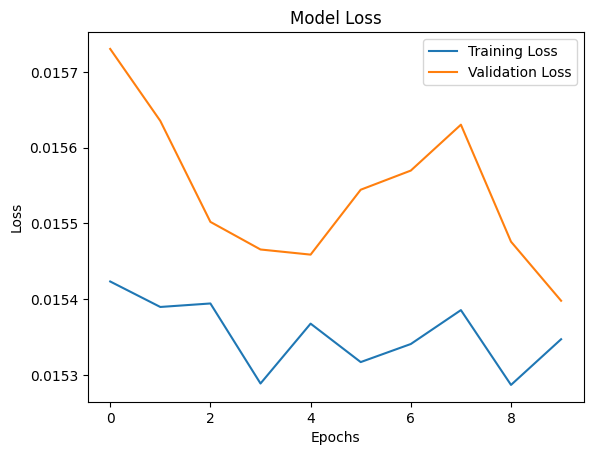

In [67]:
# Creación del gráfico Loss vs Epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ahora grafiquemos los datos:

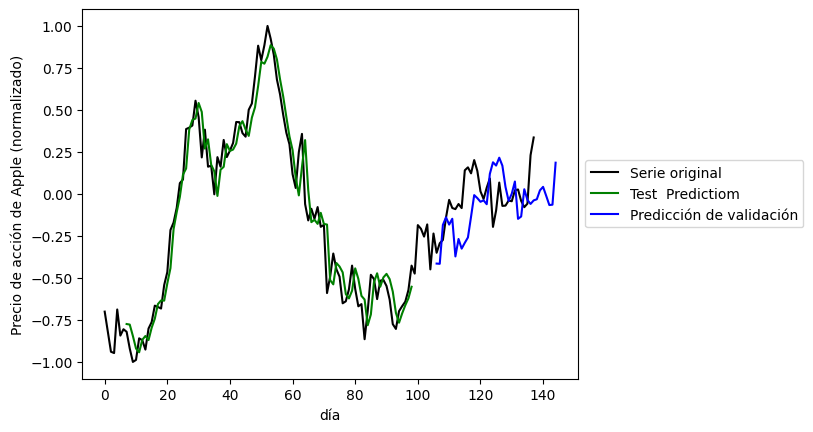

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# Graficar serie original
plt.plot(dataset, color='k')

# Graficar train predict
plt.plot(np.arange(window_size, len(train_predict) + window_size), train_predict, color='g')

# Graficar test predict
plt.plot(np.arange(len(train_predict) + (window_size*2), len(train_predict) + (window_size*2) + len(test_predict)), test_predict, color='b')

# Agregar detalles del gráfico
plt.xlabel('día')
plt.ylabel('Precio de acción de Apple (normalizado)')
plt.legend(['Serie original','Test  Predictiom','Predicción de validación'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Nota:[Aquí](https://datamarket.com/data/list/?q=provider%3Atsdl) se pueden encontrar otras series ordenadas con las que probar

### Puntos de mejora
A continuación listar o llevar adelante los puntos que se entiende pueden mejorar la solución alcanzada.

(Completar respuesta aquí)

In [ ]:
# Completar respuesta

- Aumentar la cantidad de datos: Considero que la cantidad de datos para este tipo de solución se queda corta, aumentaría la cantidad de datos historicos para entrenar el modelo, esto permitirá que el modelo aprenda más "variedad" para este set dataos, al igual que patronel temporales más complejos, reduciendo el sobreajuste de datos
- Parametros de batch y  epoch: Como se muestra en la función de perdida, ambas líneas dismiuyen sin embargo estos datos fueron escogidos con ensayo y error (guiada por los valores cómunes para este tipo de soluciones). En cambio, si se realiza un proceso de ajuste para los mismos, esto permitirá optimizar mejor el modelo